## exercise 0:

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


D:\code\ProjectOfPyCharm\cs405_MachineLearning\lab\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


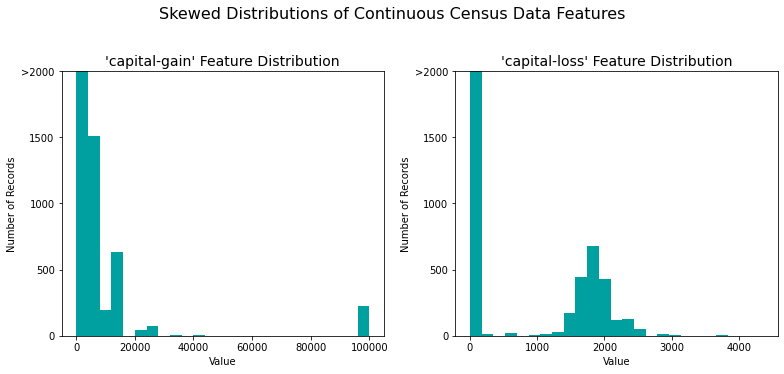

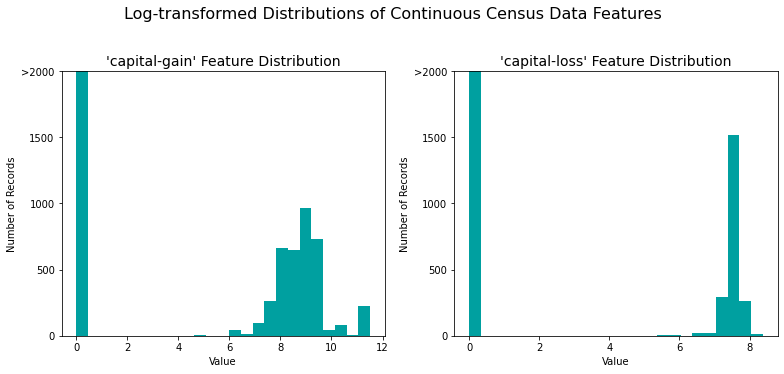

In [2]:
#import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
#Allows the use of display() for DataFrames
from IPython.display import display

#Import supplementary visualization code visuals.py
import visuals as vs

#pretty display for notebooks
%matplotlib inline

#Load the Census dataset
data = pd.read_csv("census.csv")

#Success - Display the first record
display(data.head(n=1))

#split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income',axis=1)

#visualize skewed continuous features of original data
vs.distribution(data)


#Log-transform the skewed features
skewed = ['capital-gain','capital-loss']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x:np.log(x+1))

#Visualize the new log distributions
vs.distribution(features_log_transformed,transformed = True)

#inport sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() #default = (0,1)
numerical = ['age','education-num','capital-gain','capital-loss','hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

#show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))

## exercise 1
**do one-hot encoding**
**<=50k become 0,>50k become 1**
using pandas.get_dummies()can perform one-hot encoding.

In [3]:
non_number_feature = ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']
non_number = data[non_number_feature]
non_number_transform = pd.get_dummies(non_number)
display(non_number_transform.head(n=10))

income_raw[income_raw=='<=50K']=0
income_raw[income_raw=='>50K']=1
display(income_raw.head(n=10))

income = income_raw.tolist();

# import train_test_split
from sklearn.model_selection import train_test_split

features_final = data.copy();
features_final = features_final.drop('income',axis=1)
features_final = features_final.drop(non_number_feature,axis=1)
features_final[numerical] = features_log_minmax_transform[numerical]
features_final[non_number_transform.columns] = non_number_transform
display(features_final.head(n=8))

# split the 'feature' and 'income' data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(features_final,income,test_size=0.2,random_state=0)

#show the results of the split
print("Training set has {} samples.",format(X_train.shape[0]))
print("Testing set has {} samples.",format(X_test.shape[0]))


,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


C:\Users\HUAWEI\AppData\Local\Temp/ipykernel_20388/2638123005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_raw[income_raw=='<=50K']=0
C:\Users\HUAWEI\AppData\Local\Temp/ipykernel_20388/2638123005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_raw[income_raw=='>50K']=1


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    1
9    1
Name: income, dtype: object

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.273973,0.866667,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.438356,0.266667,0.000000,0.0,0.153061,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.479452,0.533333,0.000000,0.0,0.448980,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Training set has {} samples. 36177
Testing set has {} samples. 9045
